In [36]:
import numpy as np
import matplotlib.pyplot as plt 

# punkty kontrolne
W = np.array([[39.5, 10.5], [30, 20], [6, 6], [13, -12], [63, -12.5], [18.5, 17.5,],
              [48, 63], [7, 25.5], [48.5, 49.5], [9, 19.5], [48.5, 35.5], [59, 32.5], 
              [56, 20.5]], dtype=np.float128)

# wagi
S = np.array([1, 2, 3, 2.5, 6, 1.5, 5, 1, 2, 1, 3, 5, 1], dtype=np.float128)

In [21]:
n = len(S)
def de_Casteljau(t: np.float128) -> np.array:
    Px = W[:, 0] * S 
    Py = W[:, 1] * S 
    S_copy = S.copy()
    
    for k in range(1, n):
        for i in range(n - k):
            Px[i] = (1 - t) * Px[i] + t * Px[i + 1]
            Py[i] = (1 - t) * Py[i] + t * Py[i + 1]
            S_copy[i] = (1 - t) * S_copy[i] + t * S_copy[i + 1]
    
    return np.array([Px[0] / S_copy[0], Py[0] / S_copy[0]])

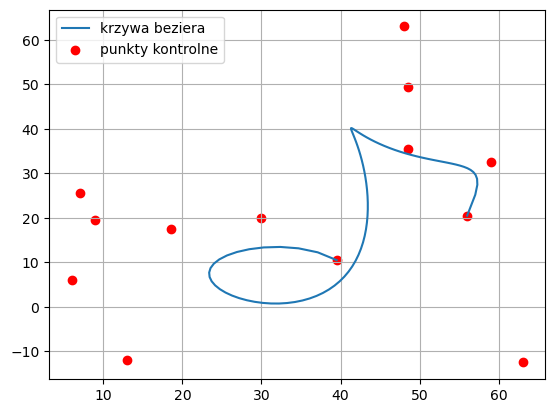

In [37]:
ts = np.linspace(0., 1., 100)
ts = np.array([de_Casteljau(t) for t in ts])

plt.plot(ts[:, 0], ts[:, 1], label='krzywa beziera')
plt.scatter(W[:, 0], W[:, 1], color='red', label='punkty kontrolne')
plt.grid(True)
plt.legend()

plt.show()